<a href="https://colab.research.google.com/github/dheandraatr/skripsi/blob/main/Lampiran_Code_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perbandingan Metode Random Forest dan Extreme Gradient Boosting dalam Klasifikasi Multi-class Layanan Konektivitas di PLN Icon Plus**

Penulis: Dheandra Azzahra Triyasnanda

NIM: 162012133028

Program Studi Teknologi Sains Data

Fakultas Teknologi Maju dan Multidisiplin

Universitas Airlangga

2023

## Load Data and EDA

### Load data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load your dataset
data = pd.read_excel('data 2017 cleaned.xlsx')

### First Inspection

In [ ]:
data.isnull().sum()

Segment           0
Tipe              0
Layanan           0
Bandwidth         0
Biaya_Sewa        0
Wilayah           0
Kabupaten/Kota    0
dtype: int64

In [ ]:
data.describe()

,Bandwidth,Biaya_Sewa
count,1150.000000,1.150000e+03
mean,29.465217,2.013681e+06
std,101.856826,4.323546e+06
min,1.000000,2.500000e+05
25%,2.000000,3.000000e+05
50%,20.000000,9.281818e+05
75%,20.000000,2.400000e+06
max,2000.000000,8.167568e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment         1150 non-null   object 
 1   Tipe            1150 non-null   object 
 2   Layanan         1150 non-null   object 
 3   Bandwidth       1150 non-null   int64  
 4   Biaya_Sewa      1150 non-null   float64
 5   Wilayah         1150 non-null   object 
 6   Kabupaten/Kota  1150 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 63.0+ KB


### Visualization

In [ ]:
# Data Visualization Function for Each Variable

def viz(data):
    plots = []

    # Histogram for 'Bandwidth'
    plt.figure(figsize=(8, 6))
    plt.hist(data['Bandwidth'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Bandwidth')
    plt.ylabel('Frequency')
    plt.title('Distribution of Bandwidth')
    plots.append(plt)

    # Bar plot for 'Bandwidth'
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Bandwidth', palette='viridis')
    plt.xlabel('Bandwidth')
    plt.ylabel('Count')
    plt.title('Distribution of Bandwidths')
    plt.xticks(rotation=45)
    plots.append(plt)

    # Histogram for 'Biaya_Sewa'
    plt.figure(figsize=(8, 6))
    plt.hist(data['Biaya_Sewa'], bins=20, color='lightcoral', edgecolor='black')
    plt.xlabel('Biaya Sewa')
    plt.ylabel('Frequency')
    plt.title('Distribution of Biaya Sewa')
    plots.append(plt)


    # Bar plot for 'Segment'
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Segment', palette='viridis')
    plt.xlabel('Segment')
    plt.ylabel('Count')
    plt.title('Distribution of Segments')
    plt.xticks(rotation=45)
    plots.append(plt)


    # Bar plot for 'Tipe'
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Tipe', palette='viridis')
    plt.xlabel('Tipe')
    plt.ylabel('Count')
    plt.title('Distribution of Tipe')
    plt.xticks(rotation=0)
    plots.append(plt)


    # Bar plot for 'Wilayah'
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Wilayah', palette='viridis')
    plt.xlabel('Wilayah')
    plt.ylabel('Count')
    plt.title('Distribution of Wilayah')
    plt.xticks(rotation=0)
    plots.append(plt)


    # Bar plot for 'Kabupaten/Kota'
    plt.figure(figsize=(14, 6))
    sns.countplot(data=data, x='Kabupaten/Kota', palette='viridis')
    plt.xlabel('Kabupaten/Kota')
    plt.ylabel('Count')
    plt.title('Distribution of Kabupaten/Kota')
    plt.xticks(rotation=90)
    plots.append(plt)


    # Box plot for 'Bandwidth' vs 'Layanan'
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Layanan', y='Bandwidth', palette='Set2')
    plt.xlabel('Layanan')
    plt.ylabel('Bandwidth')
    plt.title('Bandwidth Distribution by Layanan')
    plt.xticks(rotation=45)
    plots.append(plt)


    # Box plot for 'Biaya_Sewa' vs 'Layanan'
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Layanan', y='Biaya_Sewa', palette='Set2')
    plt.xlabel('Layanan')
    plt.ylabel('Biaya Sewa')
    plt.title('Biaya Sewa Distribution by Layanan')
    plt.xticks(rotation=45)
    plots.append(plt)


    # Box plot for 'Bandwidth'
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y='Bandwidth', palette='Set2')
    plt.ylabel('Bandwidth')
    plt.title('Box Plot of Bandwidth')
    plots.append(plt)


    # Box plot for 'Biaya_Sewa'
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y='Biaya_Sewa', palette='Set2')
    plt.ylabel('Biaya Sewa')
    plt.title('Box Plot of Biaya Sewa')
    plots.append(plt)


    # Pairplot for numerical features
    sns.pairplot(data=data, vars=['Bandwidth', 'Biaya_Sewa'])
    plt.suptitle('Pairplot of Numerical Features')
    plots.append(plt)


    return plots

[<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module '

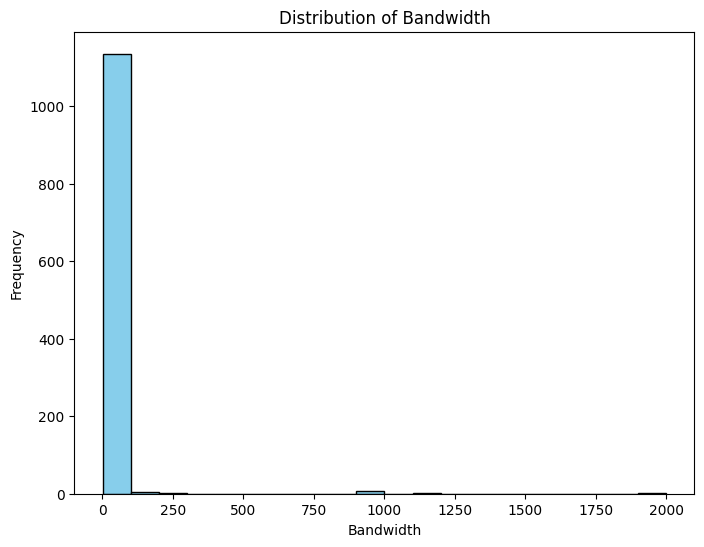

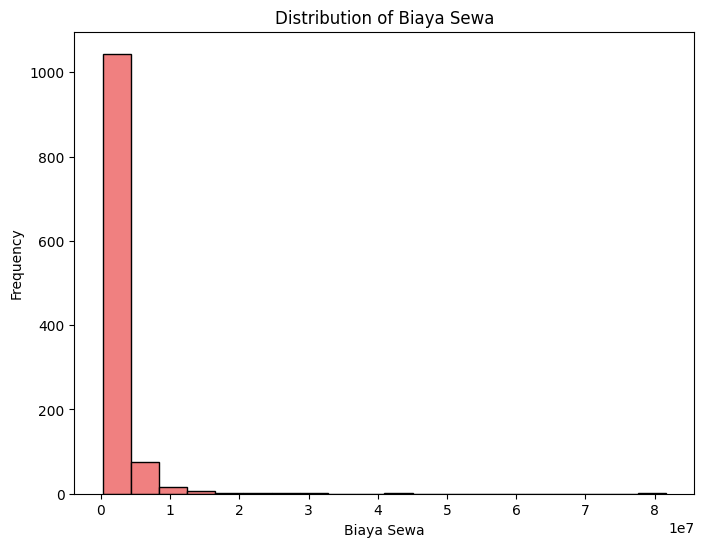

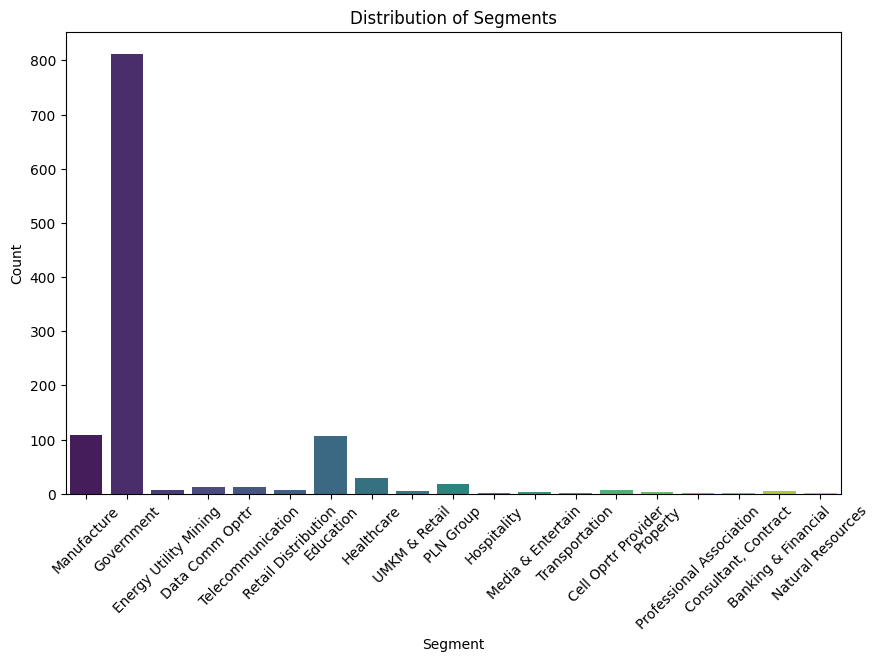

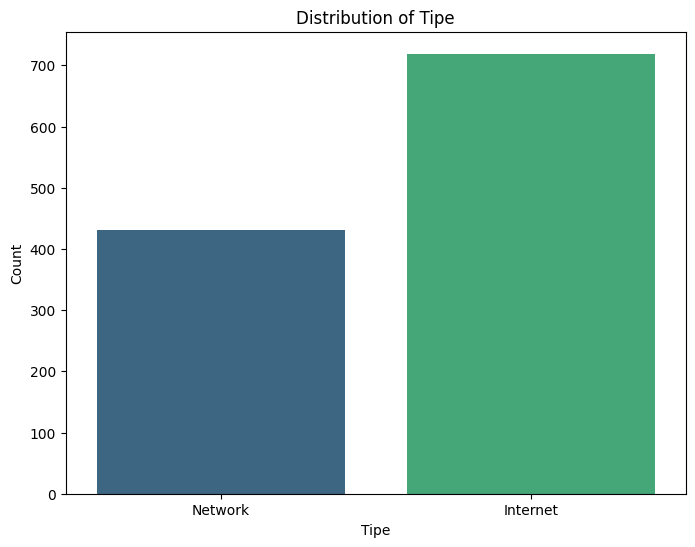

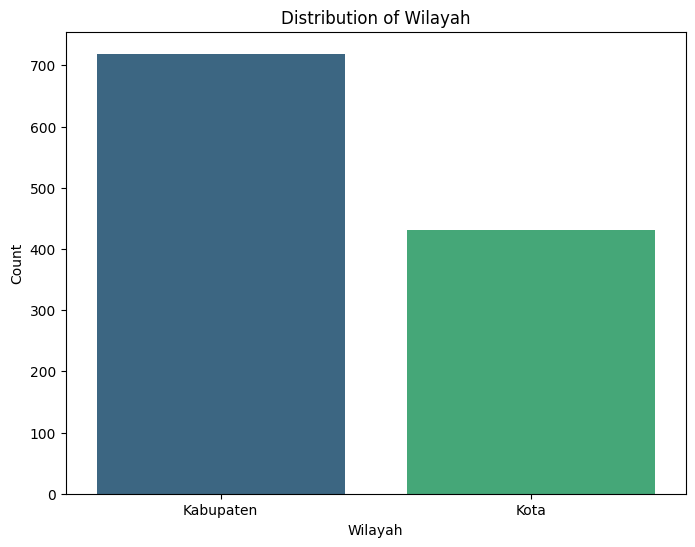

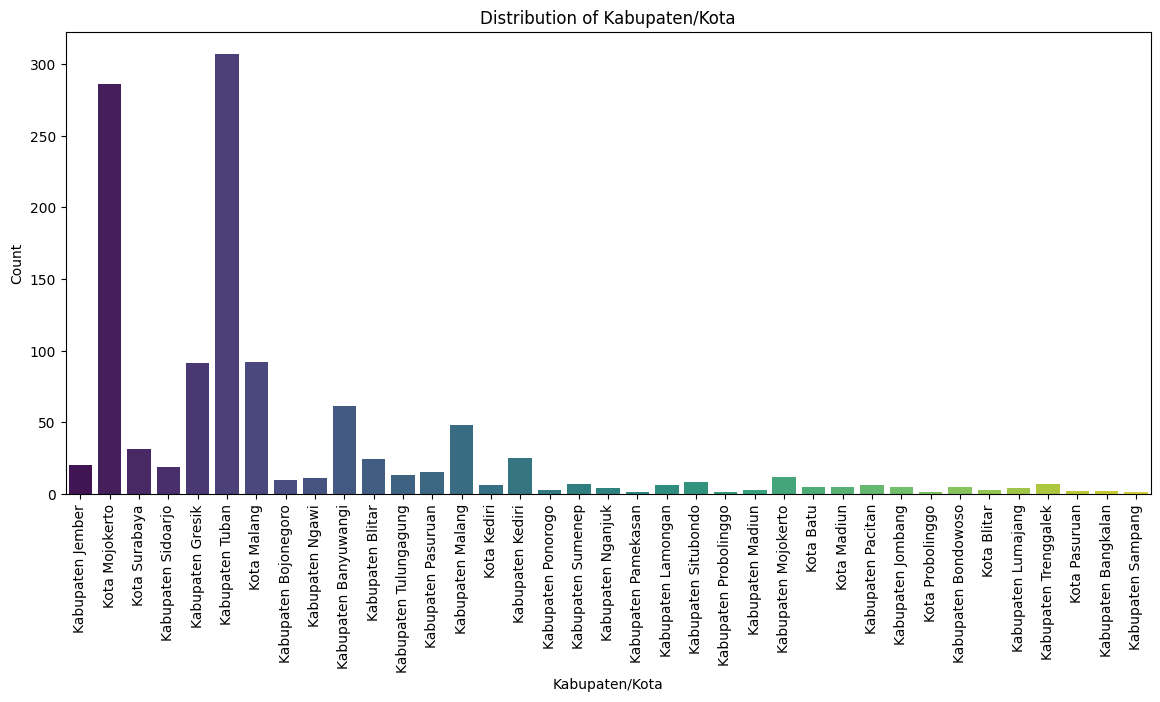

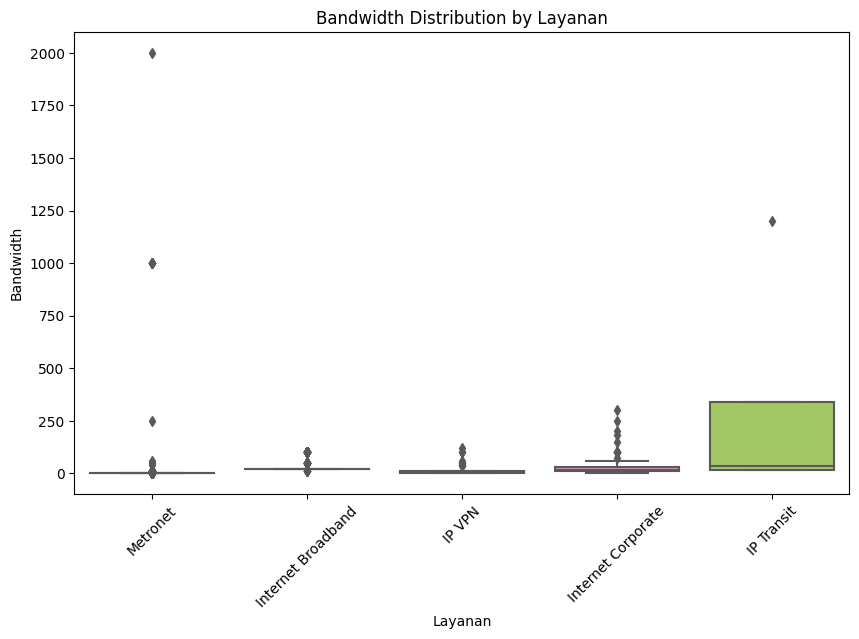

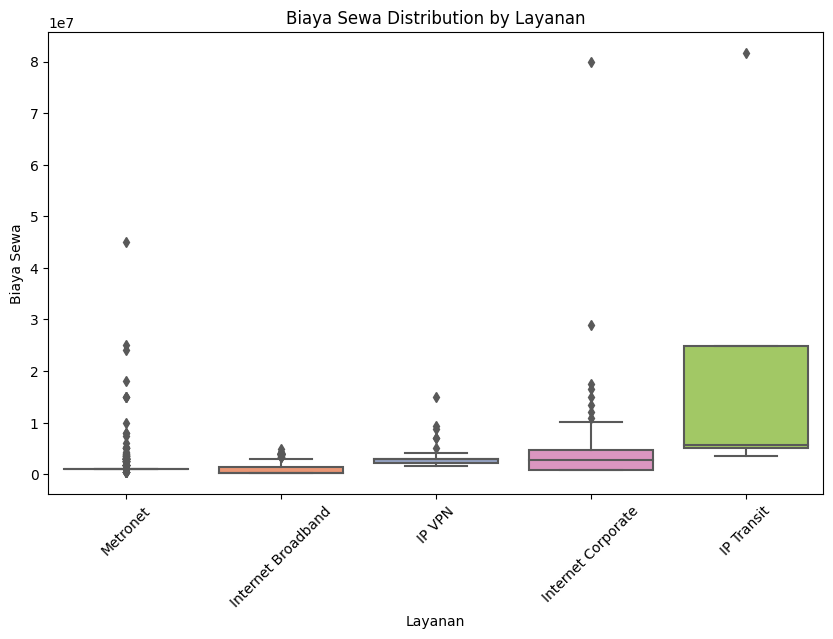

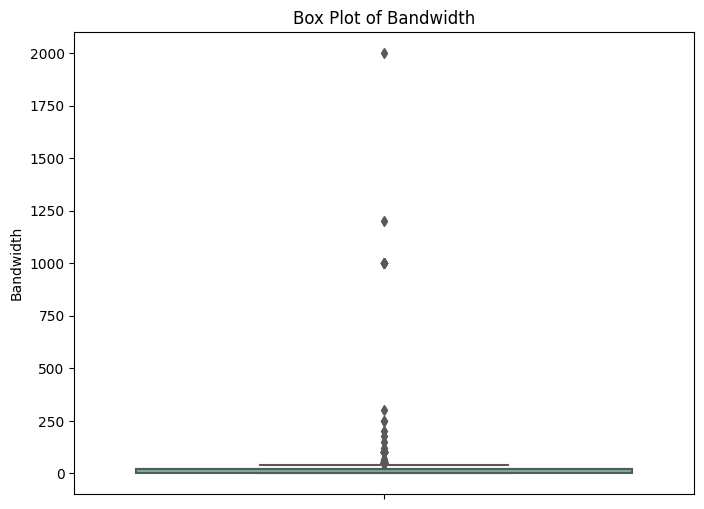

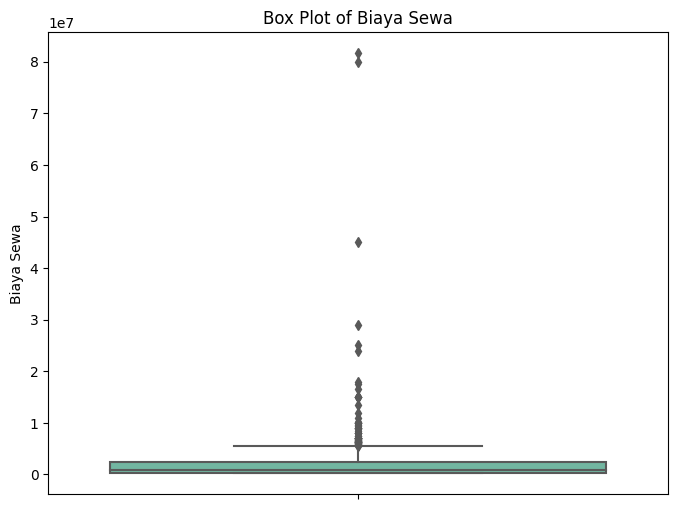

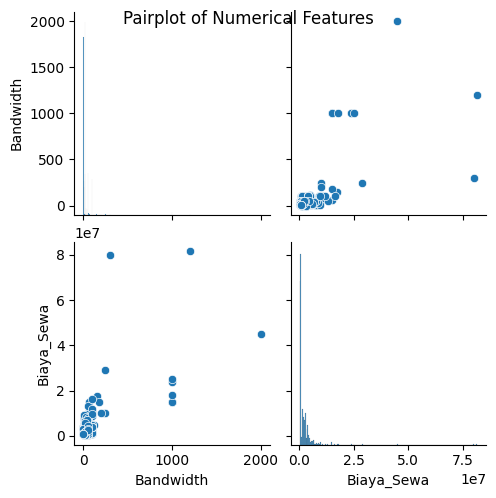

In [ ]:
#Visualization before outlier
viz(data)

### Outlier removal

In [ ]:
#Outlier Removal
# Calculate the IQR for 'Bandwidth'
Q1_bandwidth = data['Bandwidth'].quantile(0.25)
Q3_bandwidth = data['Bandwidth'].quantile(0.75)
IQR_bandwidth = Q3_bandwidth - Q1_bandwidth

# Calculate the upper and lower bounds for 'Bandwidth'
lower_bound_bandwidth = Q1_bandwidth - 1.5 * IQR_bandwidth
upper_bound_bandwidth = Q3_bandwidth + 1.5 * IQR_bandwidth

# Remove outliers from 'Bandwidth'
data = data[(data['Bandwidth'] >= lower_bound_bandwidth) & (data['Bandwidth'] <= upper_bound_bandwidth)]

# Calculate the IQR for 'Biaya_Sewa'
Q1_biaya_sewa = data['Biaya_Sewa'].quantile(0.25)
Q3_biaya_sewa = data['Biaya_Sewa'].quantile(0.75)
IQR_biaya_sewa = Q3_biaya_sewa - Q1_biaya_sewa

# Calculate the upper and lower bounds for 'Biaya_Sewa'
lower_bound_biaya_sewa = Q1_biaya_sewa - 1.5 * IQR_biaya_sewa
upper_bound_biaya_sewa = Q3_biaya_sewa + 1.5 * IQR_biaya_sewa

# Remove outliers from 'Biaya_Sewa'
data = data[(data['Biaya_Sewa'] >= lower_bound_biaya_sewa) & (data['Biaya_Sewa'] <= upper_bound_biaya_sewa)]


[<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 <module '

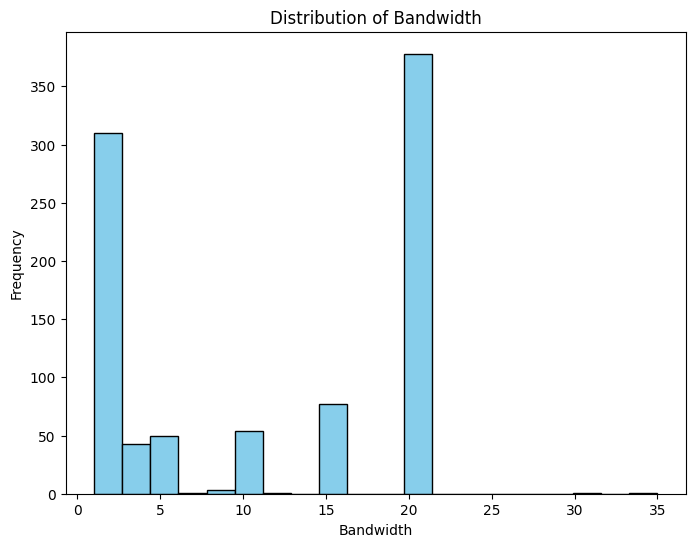

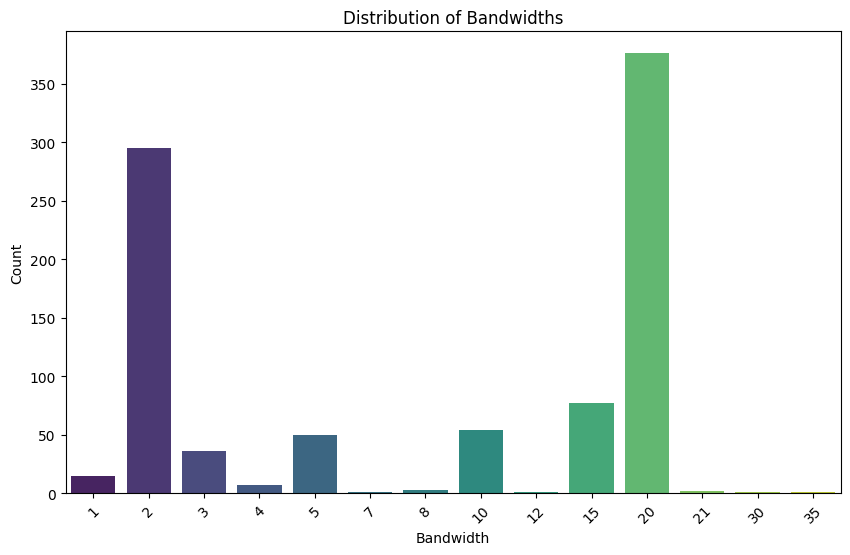

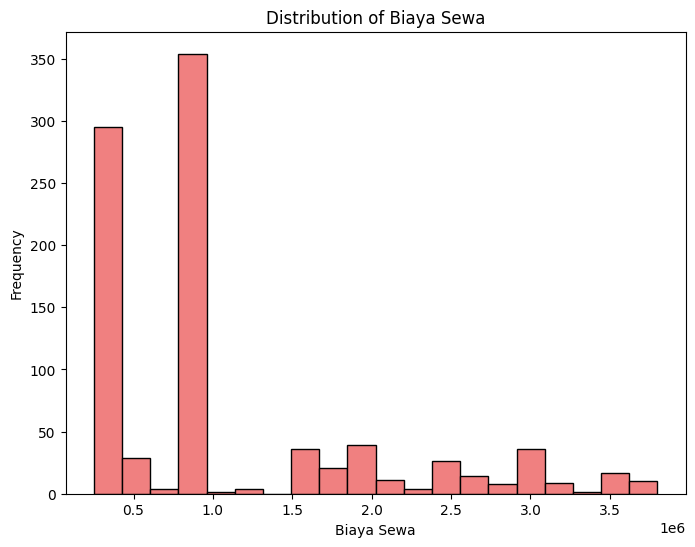

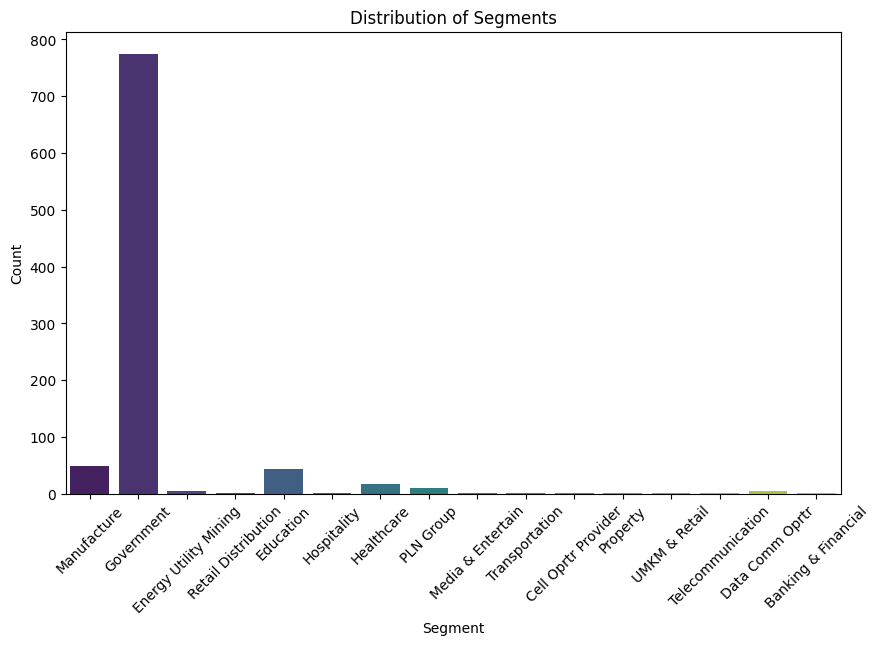

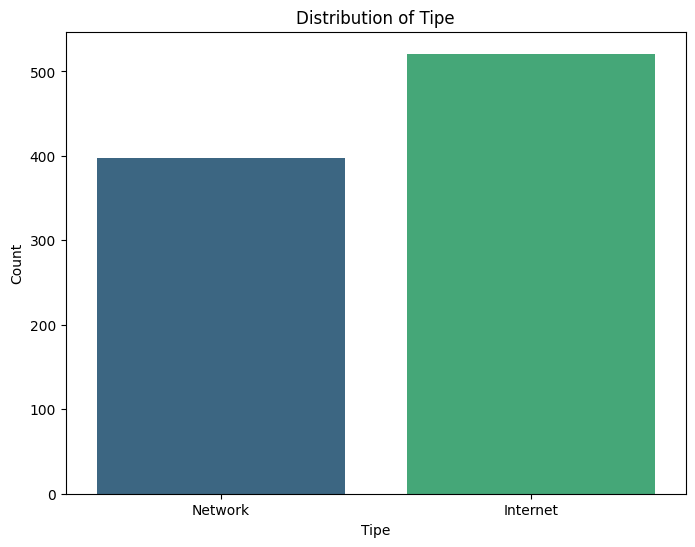

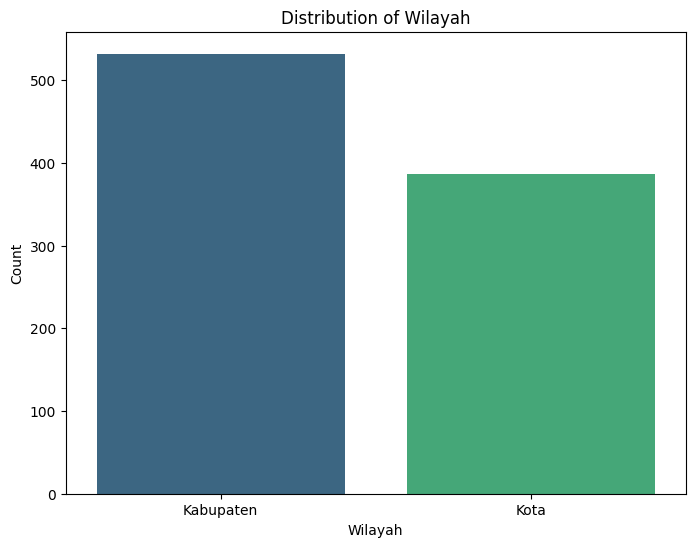

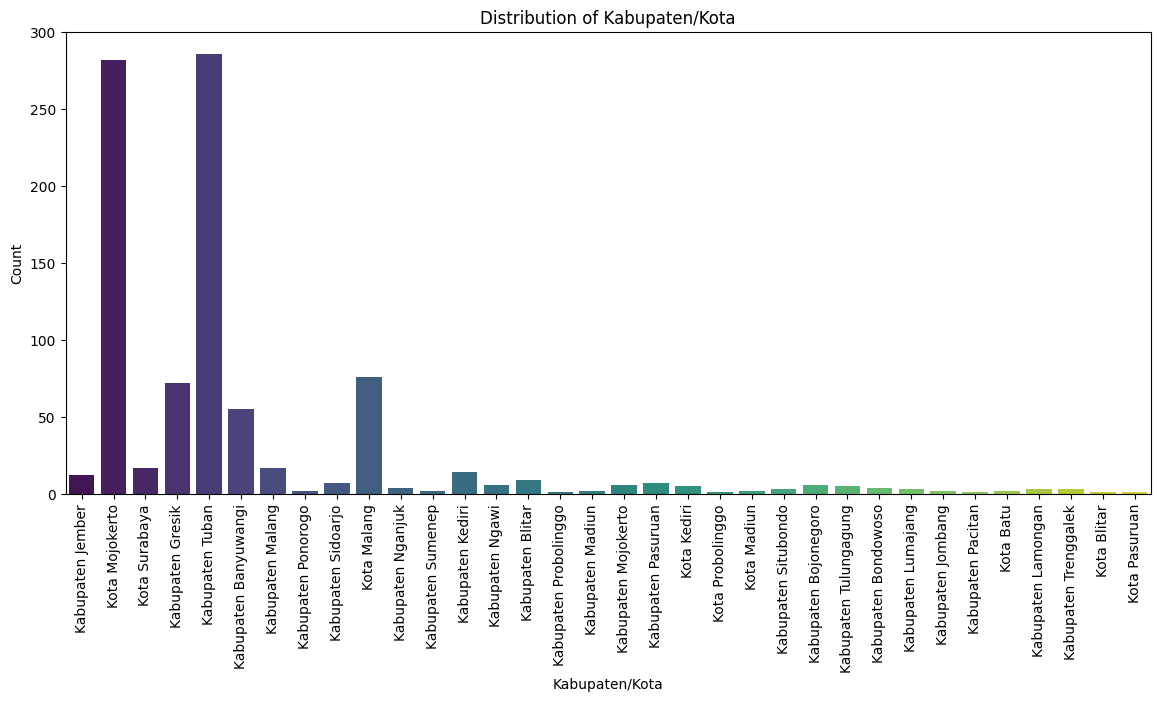

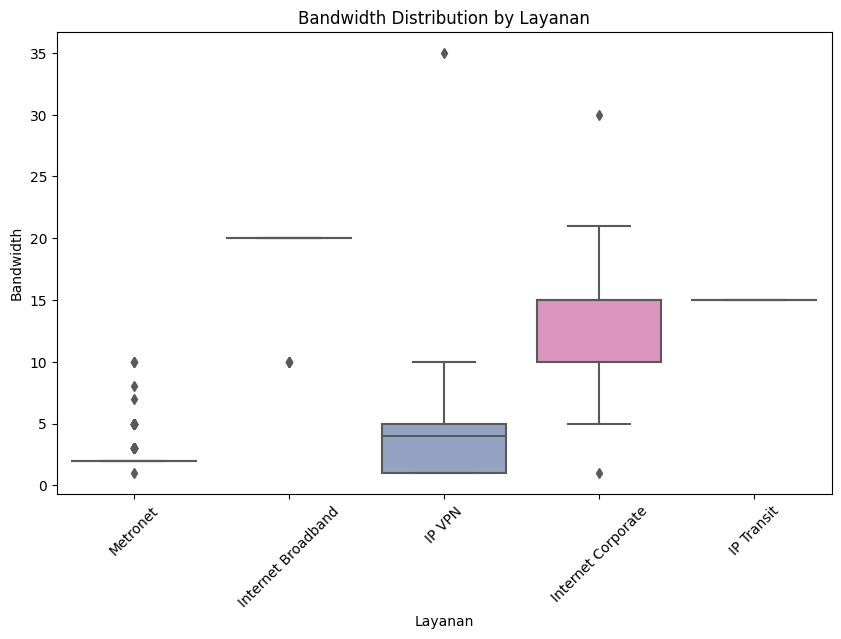

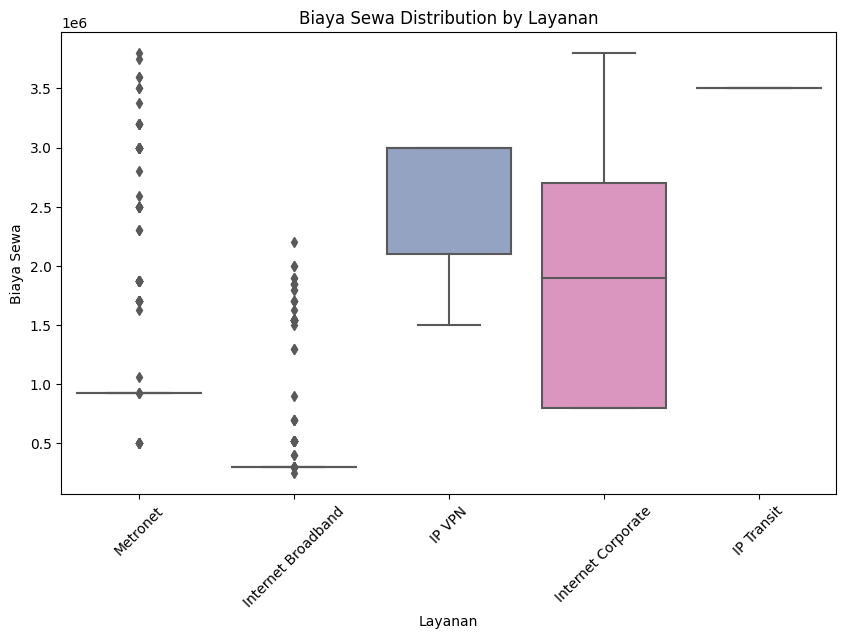

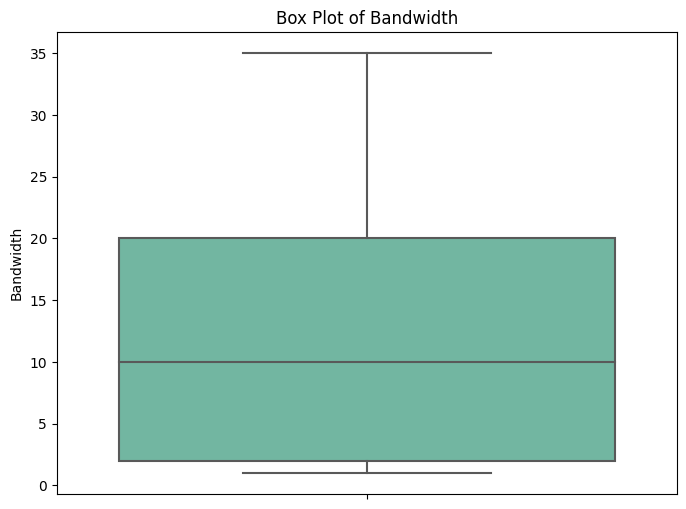

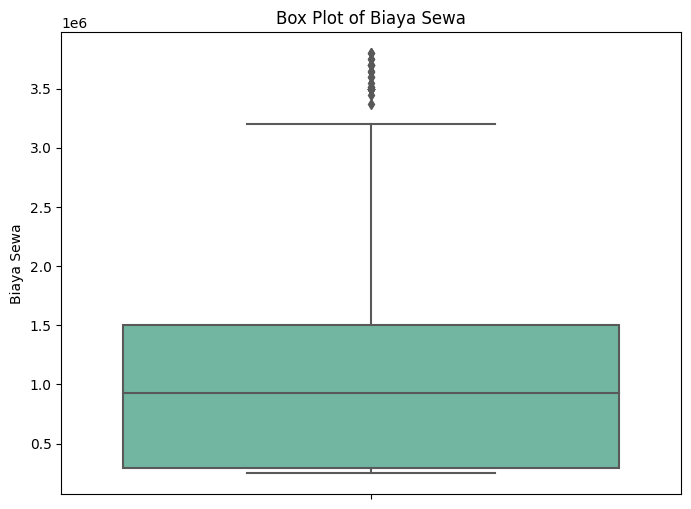

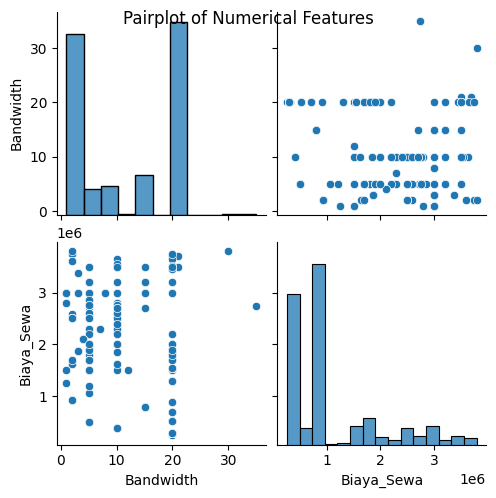

In [ ]:
#Visualization after outlier
viz(data)

In [ ]:
# data.to_excel(r'data 2017 cleaned visualisasi.xlsx', index=True)

In [ ]:
data["Layanan"].value_counts()

Internet Broadband    367
Metronet              363
Internet Corporate    153
IP VPN                 35
IP Transit              1
Name: Layanan, dtype: int64

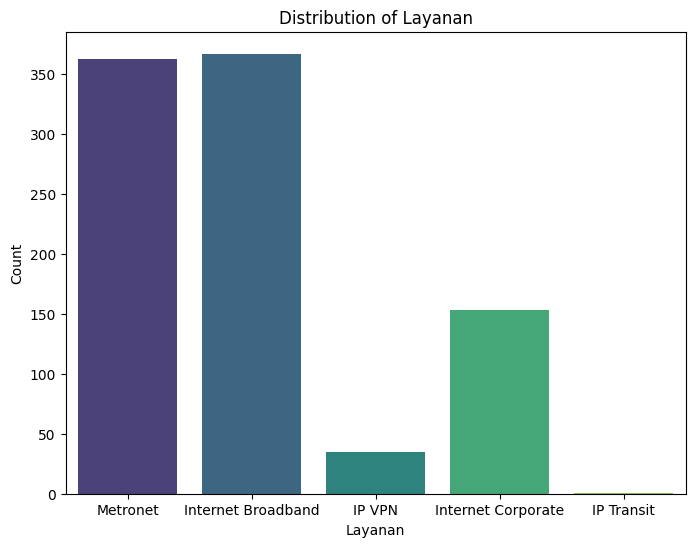

In [ ]:
# Bar plot for 'Layanan'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Layanan', palette='viridis')
plt.xlabel('Layanan')
plt.ylabel('Count')
plt.title('Distribution of Layanan')
plt.xticks(rotation=0)
plt.show()

### Drop value

In [ ]:
data = data[data.Layanan != "IP Transit"]

## Encoding, Scaling, Split data

In [ ]:
data2 = data
# Separate features and target
X2 = data2.drop('Layanan', axis=1)
y2 = data2['Layanan']

# Select categorical columns
categorical_cols = ['Segment', 'Tipe', 'Wilayah', 'Kabupaten/Kota']

# Select numerical columns
numerical_cols = ['Bandwidth', 'Biaya_Sewa']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X2_encoded = encoder.fit_transform(X2[categorical_cols])

# Encode the target variable y
from sklearn.preprocessing import LabelEncoder
encoder_y = LabelEncoder()
y_encoded = encoder_y.fit_transform(y2)

# Scale numerical columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X2_scaled = scaler.fit_transform(X2[numerical_cols])

# Combine encoded categorical and scaled numerical features
X2_final = pd.DataFrame(X2_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
X2_final[numerical_cols] = X2_scaled

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_final, y_encoded, test_size=0.2, random_state=42)


## With Cross Validation K=10

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import (KFold, StratifiedKFold)
from imblearn.over_sampling import (SMOTE,ADASYN)
import numpy as np
from collections import Counter
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
import time
import psutil

### Random Forest

#### Random Forest: K Fold - SMOTE

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize KFold


# Initialize lists to store resource usage metrics


    # Count the number of instances in each class before SMOTE


    # Start monitoring training time


    # Apply SMOTE within each training fold

    # Count the number of instances in each class after SMOTE


    # Fit Model on Resampled Train


    # Predictions and evaluation with balanced weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_rf1_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_rf1_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_rf1_2} bytes')

======= Fold 0 ========
Class counts before SMOTE (Fold 0): Counter({1: 267, 3: 255, 2: 112, 0: 26})
Class counts after SMOTE (Fold 0): Counter({1: 267, 2: 267, 3: 267, 0: 267})
Our balanced weighted accuracy on the validation set is 0.9000
Training time for Fold 0: 0.25 seconds
Memory usage for Fold 0: 250712064 bytes
======= Fold 1 ========
Class counts before SMOTE (Fold 1): Counter({1: 274, 3: 249, 2: 109, 0: 28})
Class counts after SMOTE (Fold 1): Counter({1: 274, 2: 274, 3: 274, 0: 274})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 1: 0.22 seconds
Memory usage for Fold 1: 252694528 bytes
======= Fold 2 ========
Class counts before SMOTE (Fold 2): Counter({1: 274, 3: 247, 2: 112, 0: 27})
Class counts after SMOTE (Fold 2): Counter({1: 274, 2: 274, 3: 274, 0: 274})
Our balanced weighted accuracy on the validation set is 0.9924
Training time for Fold 2: 0.22 seconds
Memory usage for Fold 2: 253235200 bytes
======= Fold 3 ========
Class counts 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Our balanced weighted accuracy on the validation set is 0.9769
Training time for Fold 3: 0.23 seconds
Memory usage for Fold 3: 253235200 bytes
======= Fold 4 ========
Class counts before SMOTE (Fold 4): Counter({1: 266, 3: 257, 2: 111, 0: 27})
Class counts after SMOTE (Fold 4): Counter({2: 266, 1: 266, 3: 266, 0: 266})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 4: 0.21 seconds
Memory usage for Fold 4: 254046208 bytes
======= Fold 5 ========
Class counts before SMOTE (Fold 5): Counter({1: 272, 3: 254, 2: 106, 0: 29})
Class counts after SMOTE (Fold 5): Counter({1: 272, 2: 272, 3: 272, 0: 272})
Our balanced weighted accuracy on the validation set is 0.9904
Training time for Fold 5: 0.21 seconds
Memory usage for Fold 5: 254046208 bytes
======= Fold 6 ========
Class counts before SMOTE (Fold 6): Counter({1: 277, 3: 247, 2: 107, 0: 30})
Class counts after SMOTE (Fold 6): Counter({1: 277, 2: 277, 3: 277, 0: 277})
Our balanced weighted accuracy on the

#### Random Forest: Stratified K Fold - SMOTE

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize StratifiedKFold


# Initialize lists to store resource usage metrics




    # Count the number of instances in each class before SMOTE


    # Start monitoring training time


    # Apply SMOTE within each training fold


    # Count the number of instances in each class after SMOTE


    # Fit Model on Resampled Train


    # Predictions and evaluation with weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_rf2_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_rf2_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_rf2_2} bytes')

======= Fold 0 ========
Class counts before SMOTE (Fold 0): Counter({1: 270, 3: 252, 2: 110, 0: 28})
Class counts after SMOTE (Fold 0): Counter({1: 270, 2: 270, 3: 270, 0: 270})
Our balanced weighted accuracy on the validation set is 0.9821
Training time for Fold 0: 0.27 seconds
Memory usage for Fold 0: 272244736 bytes
======= Fold 1 ========
Class counts before SMOTE (Fold 1): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after SMOTE (Fold 1): Counter({1: 271, 2: 271, 3: 271, 0: 271})
Our balanced weighted accuracy on the validation set is 0.9744
Training time for Fold 1: 0.18 seconds
Memory usage for Fold 1: 272244736 bytes
======= Fold 2 ========
Class counts before SMOTE (Fold 2): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after SMOTE (Fold 2): Counter({1: 271, 2: 271, 3: 271, 0: 271})
Our balanced weighted accuracy on the validation set is 0.9917
Training time for Fold 2: 0.19 seconds
Memory usage for Fold 2: 272244736 bytes
======= Fold 3 ========
Class counts 

#### Random Forest: K Fold - ADASYN

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize KFold


# Initialize lists to store resource usage metrics




    # Count the number of instances in each class before ADASYN


    # Start monitoring training time


    # Apply ADASYN within each training fold


    # Count the number of instances in each class after ADASYN


    # Fit Model on Resampled Train


    # Predictions and evaluation with weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_rf3_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_rf3_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_rf3_2} bytes')

======= Fold 0 ========
Class counts before ADASYN (Fold 0): Counter({1: 267, 3: 255, 2: 112, 0: 26})
Class counts after ADASYN (Fold 0): Counter({1: 267, 0: 267, 3: 255, 2: 112})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 0: 0.20 seconds
Memory usage for Fold 0: 255451136 bytes
======= Fold 1 ========
Class counts before ADASYN (Fold 1): Counter({1: 274, 3: 249, 2: 109, 0: 28})
Class counts after ADASYN (Fold 1): Counter({1: 274, 0: 270, 3: 249, 2: 109})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 1: 0.20 seconds
Memory usage for Fold 1: 255451136 bytes
======= Fold 2 ========
Class counts before ADASYN (Fold 2): Counter({1: 274, 3: 247, 2: 112, 0: 27})
Class counts after ADASYN (Fold 2): Counter({0: 275, 1: 274, 3: 247, 2: 112})
Our balanced weighted accuracy on the validation set is 0.9299
Training time for Fold 2: 0.20 seconds
Memory usage for Fold 2: 255782912 bytes
======= Fold 3 ========
Class c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Our balanced weighted accuracy on the validation set is 0.9769
Training time for Fold 3: 0.21 seconds
Memory usage for Fold 3: 255782912 bytes
======= Fold 4 ========
Class counts before ADASYN (Fold 4): Counter({1: 266, 3: 257, 2: 111, 0: 27})
Class counts after ADASYN (Fold 4): Counter({0: 268, 1: 266, 3: 257, 2: 111})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 4: 0.21 seconds
Memory usage for Fold 4: 255782912 bytes
======= Fold 5 ========
Class counts before ADASYN (Fold 5): Counter({1: 272, 3: 254, 2: 106, 0: 29})
Class counts after ADASYN (Fold 5): Counter({0: 273, 1: 272, 3: 254, 2: 106})
Our balanced weighted accuracy on the validation set is 0.9904
Training time for Fold 5: 0.22 seconds
Memory usage for Fold 5: 256323584 bytes
======= Fold 6 ========
Class counts before ADASYN (Fold 6): Counter({1: 277, 3: 247, 2: 107, 0: 30})
Class counts after ADASYN (Fold 6): Counter({1: 277, 0: 272, 3: 247, 2: 107})
Our balanced weighted accuracy 

#### Random Forest: Stratified K Fold - ADASYN

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize StratifiedKFold


# Initialize lists to store resource usage metrics


    # Count the number of instances in each class before ADASYN

    print(f"Class counts before ADASYN (Fold {fold}): {class_counts_before}")

    # Start monitoring training time


    # Apply ADASYN within each training fold


    # Count the number of instances in each class after ADASYN

    print(f"Class counts after ADASYN (Fold {fold}): {class_counts_after}")

    # Fit Model on Resampled Train


    # Predictions and evaluation with weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_rf4_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_rf4_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_rf4_2} bytes')

======= Fold 0 ========
Class counts before ADASYN (Fold 0): Counter({1: 270, 3: 252, 2: 110, 0: 28})
Class counts after ADASYN (Fold 0): Counter({0: 273, 1: 270, 3: 252, 2: 110})
Our balanced weighted accuracy on the validation set is 0.9821
Training time for Fold 0: 0.18 seconds
Memory usage for Fold 0: 273043456 bytes
======= Fold 1 ========
Class counts before ADASYN (Fold 1): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after ADASYN (Fold 1): Counter({1: 271, 0: 270, 3: 252, 2: 109})
Our balanced weighted accuracy on the validation set is 0.9744
Training time for Fold 1: 0.17 seconds
Memory usage for Fold 1: 273043456 bytes
======= Fold 2 ========
Class counts before ADASYN (Fold 2): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after ADASYN (Fold 2): Counter({1: 271, 0: 268, 3: 252, 2: 109})
Our balanced weighted accuracy on the validation set is 0.9917
Training time for Fold 2: 0.18 seconds
Memory usage for Fold 2: 273043456 bytes
======= Fold 3 ========
Class c

### XGBoost

In [ ]:
# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y2_train)
y_test_encoded = label_encoder.transform(y2_test)

#### XGBoost: K Fold - SMOTE

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize KFold


# Initialize lists to store resource usage metrics




    # Count the number of instances in each class before SMOTE


    # Start monitoring training time


    # Apply SMOTE within each training fold


    # Count the number of instances in each class after SMOTE


    # Fit Model on Resampled Train


    # Predictions and evaluation with balanced weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_xgb1_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_xgb1_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_xgb1_2} bytes')

======= Fold 0 ========
Class counts before SMOTE (Fold 0): Counter({1: 267, 3: 255, 2: 112, 0: 26})
Class counts after SMOTE (Fold 0): Counter({1: 267, 2: 267, 3: 267, 0: 267})
Our balanced weighted accuracy on the validation set is 0.9400
Training time for Fold 0: 0.23 seconds
Memory usage for Fold 0: 267210752 bytes
======= Fold 1 ========
Class counts before SMOTE (Fold 1): Counter({1: 274, 3: 249, 2: 109, 0: 28})
Class counts after SMOTE (Fold 1): Counter({1: 274, 2: 274, 3: 274, 0: 274})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 1: 0.16 seconds
Memory usage for Fold 1: 267767808 bytes
======= Fold 2 ========
Class counts before SMOTE (Fold 2): Counter({1: 274, 3: 247, 2: 112, 0: 27})
Class counts after SMOTE (Fold 2): Counter({1: 274, 2: 274, 3: 274, 0: 274})
Our balanced weighted accuracy on the validation set is 0.9907
Training time for Fold 2: 0.18 seconds
Memory usage for Fold 2: 268869632 bytes
======= Fold 3 ========
Class counts 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 4: 0.17 seconds
Memory usage for Fold 4: 269680640 bytes
======= Fold 5 ========
Class counts before SMOTE (Fold 5): Counter({1: 272, 3: 254, 2: 106, 0: 29})
Class counts after SMOTE (Fold 5): Counter({1: 272, 2: 272, 3: 272, 0: 272})
Our balanced weighted accuracy on the validation set is 0.9904
Training time for Fold 5: 0.18 seconds
Memory usage for Fold 5: 269950976 bytes
======= Fold 6 ========
Class counts before SMOTE (Fold 6): Counter({1: 277, 3: 247, 2: 107, 0: 30})
Class counts after SMOTE (Fold 6): Counter({1: 277, 2: 277, 3: 277, 0: 277})
Our balanced weighted accuracy on the validation set is 0.9896
Training time for Fold 6: 0.19 seconds
Memory usage for Fold 6: 269950976 bytes
======= Fold 7 ========
Class counts before SMOTE (Fold 7): Counter({1: 265, 3: 251, 2: 117, 0: 28})
Class counts after SMOTE (Fold 7): Counter({1: 265, 2: 265, 3: 265, 0: 265})
Our balanced weighted accuracy on the

#### XGBoost: Stratified K Fold - SMOTE

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 0
accs = []

# Initialize lists to store resource usage metrics
training_times = []
memory_usages = []

for train_idx, val_idx in skf.split(X2_train, y_train_encoded):
    print(f"======= Fold {fold} ========")

    X_tr = X2_train.iloc[train_idx]  # Use iloc to access rows by integer index
    y_tr = y_train_encoded[train_idx]

    X_val = X2_train.iloc[val_idx]
    y_val = y_train_encoded[val_idx]

    # Count the number of instances in each class before SMOTE
    class_counts_before = Counter(y_tr)
    print(f"Class counts before SMOTE (Fold {fold}): {class_counts_before}")

    # Start monitoring training time
    start_time = time.time()

    # Apply SMOTE within each training fold
    smote = SMOTE(random_state=42)
    X_tr_resampled, y_tr_resampled = smote.fit_resample(X_tr, y_tr)

    # Count the number of instances in each class after SMOTE
    class_counts_after = Counter(y_tr_resampled)
    print(f"Class counts after SMOTE (Fold {fold}): {class_counts_after}")

    # Fit Model on Resampled Train
    xgb2 = XGBClassifier(n_estimators=100, random_state=42)
    xgb2.fit(X_tr_resampled, y_tr_resampled)

    # Predictions and evaluation with balanced weighted accuracy
    pred = xgb2.predict(X_val)
    class_weights = class_weight.compute_sample_weight('balanced', y_val)
    acc_score = balanced_accuracy_score(y_val, pred, sample_weight=class_weights)
    accs.append(acc_score)

    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time
    end_time = time.time()
    elapsed_time = end_time - start_time
    training_times.append(elapsed_time)
    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage
    process = psutil.Process()
    memory_usage = process.memory_info().rss
    memory_usages.append(memory_usage)
    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy
oof_acc_xgb2_2 = np.mean(accs)
print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_xgb2_2:.4f}')

# Display average resource usage metrics
avg_training_time_xgb2_2 = np.mean(training_times)
avg_memory_usage_xgb2_2 = np.mean(memory_usages)
print(f'Average training time: {avg_training_time_xgb2_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_xgb2_2} bytes')

======= Fold 0 ========
Class counts before SMOTE (Fold 0): Counter({1: 270, 3: 252, 2: 110, 0: 28})
Class counts after SMOTE (Fold 0): Counter({1: 270, 2: 270, 3: 270, 0: 270})
Our balanced weighted accuracy on the validation set is 0.9821
Training time for Fold 0: 0.16 seconds
Memory usage for Fold 0: 267698176 bytes
======= Fold 1 ========
Class counts before SMOTE (Fold 1): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after SMOTE (Fold 1): Counter({1: 271, 2: 271, 3: 271, 0: 271})
Our balanced weighted accuracy on the validation set is 0.9917
Training time for Fold 1: 0.17 seconds
Memory usage for Fold 1: 268238848 bytes
======= Fold 2 ========
Class counts before SMOTE (Fold 2): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after SMOTE (Fold 2): Counter({1: 271, 2: 271, 3: 271, 0: 271})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 2: 0.16 seconds
Memory usage for Fold 2: 268238848 bytes
======= Fold 3 ========
Class counts 

#### XGBoost: K Fold - ADASYN

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize KFold


# Initialize lists to store resource usage metrics




    # Count the number of instances in each class before ADASYN


    # Start monitoring training time


    # Apply ADASYN within each training fold


    # Count the number of instances in each class after ADASYN


    # Fit Model on Resampled Train


    # Predictions and evaluation with balanced weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_xgb3_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_xgb3_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_xgb3_2} bytes')

======= Fold 0 ========
Class counts before ADASYN (Fold 0): Counter({1: 267, 3: 255, 2: 112, 0: 26})
Class counts after ADASYN (Fold 0): Counter({1: 267, 0: 267, 3: 255, 2: 112})
Our balanced weighted accuracy on the validation set is 0.9900
Training time for Fold 0: 0.15 seconds
Memory usage for Fold 0: 271572992 bytes
======= Fold 1 ========
Class counts before ADASYN (Fold 1): Counter({1: 274, 3: 249, 2: 109, 0: 28})
Class counts after ADASYN (Fold 1): Counter({1: 274, 0: 270, 3: 249, 2: 109})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 1: 0.14 seconds
Memory usage for Fold 1: 271843328 bytes
======= Fold 2 ========
Class counts before ADASYN (Fold 2): Counter({1: 274, 3: 247, 2: 112, 0: 27})
Class counts after ADASYN (Fold 2): Counter({0: 275, 1: 274, 3: 247, 2: 112})
Our balanced weighted accuracy on the validation set is 0.9907
Training time for Fold 2: 0.15 seconds
Memory usage for Fold 2: 271843328 bytes
======= Fold 3 ========
Class c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Our balanced weighted accuracy on the validation set is 0.9769
Training time for Fold 3: 0.15 seconds
Memory usage for Fold 3: 271843328 bytes
======= Fold 4 ========
Class counts before ADASYN (Fold 4): Counter({1: 266, 3: 257, 2: 111, 0: 27})
Class counts after ADASYN (Fold 4): Counter({0: 268, 1: 266, 3: 257, 2: 111})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 4: 0.15 seconds
Memory usage for Fold 4: 271843328 bytes
======= Fold 5 ========
Class counts before ADASYN (Fold 5): Counter({1: 272, 3: 254, 2: 106, 0: 29})
Class counts after ADASYN (Fold 5): Counter({0: 273, 1: 272, 3: 254, 2: 106})
Our balanced weighted accuracy on the validation set is 0.8654
Training time for Fold 5: 0.18 seconds
Memory usage for Fold 5: 271843328 bytes
======= Fold 6 ========
Class counts before ADASYN (Fold 6): Counter({1: 277, 3: 247, 2: 107, 0: 30})
Class counts after ADASYN (Fold 6): Counter({1: 277, 0: 272, 3: 247, 2: 107})
Our balanced weighted accuracy 

#### XGBoost: Stratified K Fold - ADASYN

In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize StratifiedKFold


# Initialize lists to store resource usage metrics



    # Count the number of instances in each class before ADASYN


    # Start monitoring training time


    # Apply ADASYN within each training fold


    # Count the number of instances in each class after ADASYN


    # Fit Model on Resampled Train


    # Predictions and evaluation with weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold weighted accuracy score is {oof_acc_xgb4_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_xgb4_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_xgb4_2} bytes')

======= Fold 0 ========
Class counts before ADASYN (Fold 0): Counter({1: 270, 3: 252, 2: 110, 0: 28})
Class counts after ADASYN (Fold 0): Counter({0: 273, 1: 270, 3: 252, 2: 110})
Our balanced weighted accuracy on the validation set is 0.9821
Training time for Fold 0: 0.15 seconds
Memory usage for Fold 0: 271843328 bytes
======= Fold 1 ========
Class counts before ADASYN (Fold 1): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after ADASYN (Fold 1): Counter({1: 271, 0: 270, 3: 252, 2: 109})
Our balanced weighted accuracy on the validation set is 0.9917
Training time for Fold 1: 0.15 seconds
Memory usage for Fold 1: 271843328 bytes
======= Fold 2 ========
Class counts before ADASYN (Fold 2): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after ADASYN (Fold 2): Counter({1: 271, 0: 268, 3: 252, 2: 109})
Our balanced weighted accuracy on the validation set is 1.0000
Training time for Fold 2: 0.16 seconds
Memory usage for Fold 2: 271843328 bytes
======= Fold 3 ========
Class c

## Comparison

In [ ]:
# Compare 8 models (balanced weighted accuracy & computing resource)
models = ['Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
          'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost',]

crossvals = ['K-Fold CV', 'Stratified K-Fold CV', 'K-Fold CV', 'Stratified K-Fold CV',
             'K-Fold CV', 'Stratified K-Fold CV', 'K-Fold CV', 'Stratified K-Fold CV']

oversamplings = ['SMOTE', 'SMOTE', 'ADASYN', 'ADASYN',
                 'SMOTE', 'SMOTE', 'ADASYN', 'ADASYN']

oof_accs_2 = [oof_acc_rf1_2, oof_acc_rf2_2, oof_acc_rf3_2, oof_acc_rf4_2,
           oof_acc_xgb1_2, oof_acc_xgb2_2, oof_acc_xgb3_2, oof_acc_xgb4_2]

training_time_list = [avg_training_time_rf1_2, avg_training_time_rf2_2, avg_training_time_rf3_2, avg_training_time_rf4_2,
           avg_training_time_xgb1_2, avg_training_time_xgb2_2, avg_training_time_xgb3_2, avg_training_time_xgb4_2]

memory_usage_list = [avg_memory_usage_rf1_2, avg_memory_usage_rf2_2, avg_memory_usage_rf3_2, avg_memory_usage_rf4_2,
           avg_memory_usage_xgb1_2, avg_memory_usage_xgb2_2, avg_memory_usage_xgb3_2, avg_memory_usage_xgb4_2]

# Create a DataFrame to display the results
model_summary2 = pd.DataFrame({
    'Model': models,
    'Cross-val': crossvals,
    'Oversampling': oversamplings,
    'Accuracy': oof_accs_2,
    'Training Time (seconds)': training_time_list,
    'Memory Usage (bytes)': memory_usage_list
})

print(model_summary2)

           Model             Cross-val Oversampling  Accuracy  \
0  Random Forest             K-Fold CV        SMOTE  0.966823   
1  Random Forest  Stratified K-Fold CV        SMOTE  0.989643   
2  Random Forest             K-Fold CV       ADASYN  0.984601   
3  Random Forest  Stratified K-Fold CV       ADASYN  0.990476   
4        XGBoost             K-Fold CV        SMOTE  0.988063   
5        XGBoost  Stratified K-Fold CV        SMOTE  0.993929   
6        XGBoost             K-Fold CV       ADASYN  0.975563   
7        XGBoost  Stratified K-Fold CV       ADASYN  0.985595   

   Training Time (seconds)  Memory Usage (bytes)  
0                 0.249113           253523558.4  
1                 0.224271           254964531.2  
2                 0.201583           255986892.8  
3                 0.313523           256647987.2  
4                 0.200278           269242368.0  
5                 0.168831           270870118.4  
6                 0.153689           271816294.4  
7     

## Feature Importance

### Each Variables

Kabupaten/Kota : 0.6054639703943394
Segment : 0.30880209780298173
Tipe : 0.05313408374786377
Bandwidth : 0.017990779131650925
Biaya_Sewa : 0.014154687523841858
Wilayah : 0.00045440084068104625


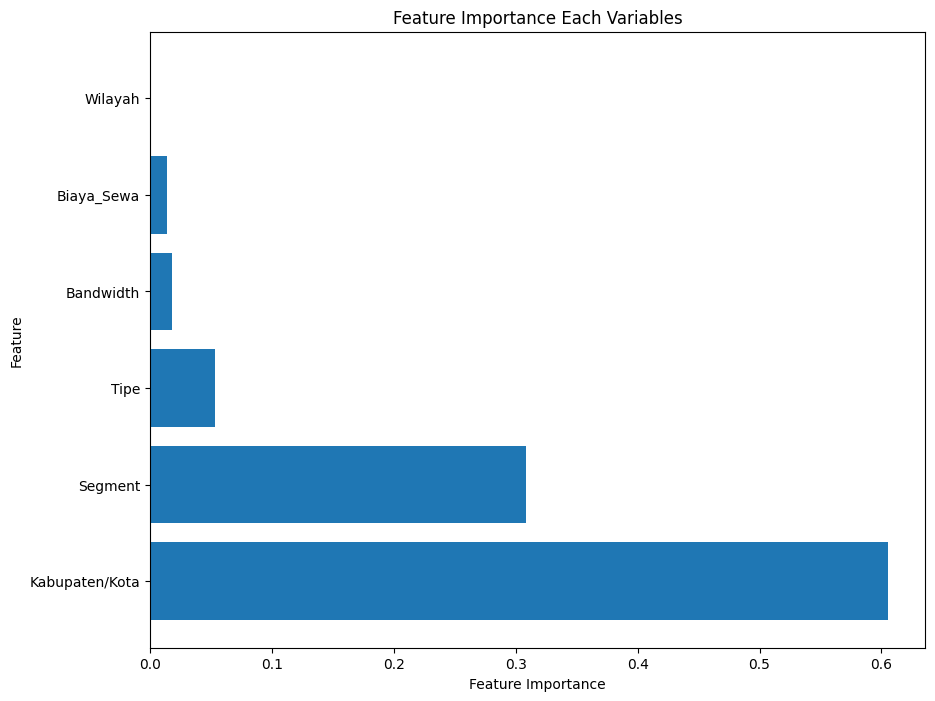

In [ ]:
# EACH VARIABLES

# Get feature importances
feature_importances = xgb2.feature_importances_

# Associate feature names with their importances
feature_names = list(X2_train.columns)
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Extract feature importances for variables
selected_features = ["Biaya_Sewa", "Bandwidth", "Tipe",
                      "Wilayah", "Segment", "Kabupaten/Kota"]

# Initialize an empty dictionary to store feature importances
selected_feature_importances = {feature: 0.0 for feature in selected_features}

# Iterate through one-hot encoded features and accumulate importances for each group
for feature in feature_importance_dict.keys():
    for selected_feature in selected_features:
        if selected_feature in feature:
            selected_feature_importances[selected_feature] += feature_importance_dict[feature]

# Sort and display selected feature importances
sorted_selected_features = sorted(selected_feature_importances.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_selected_features:
    print(feature, ":", importance)

# Plot selected feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_selected_features)), [importance for feature, importance in sorted_selected_features], align='center')
plt.yticks(range(len(sorted_selected_features)), [feature for feature, importance in sorted_selected_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Each Variables')
plt.show()


### Remodelling

In [ ]:
# Select categorical columns
categorical_columns = ['Segment', 'Tipe', 'Wilayah', 'Kabupaten/Kota']

# Select numerical columns
numerical_columns = ['Bandwidth', 'Biaya_Sewa']


Model 1 - Features: ['Kabupaten/Kota']
Fold 0: Balanced Accuracy = 0.8351
Training time for Fold 0: 0.17 seconds
Memory usage for Fold 0: 275468288 bytes
Fold 1: Balanced Accuracy = 0.7796
Training time for Fold 1: 0.15 seconds
Memory usage for Fold 1: 275468288 bytes
Fold 2: Balanced Accuracy = 0.6514
Training time for Fold 2: 0.15 seconds
Memory usage for Fold 2: 275468288 bytes
Fold 3: Balanced Accuracy = 0.7065
Training time for Fold 3: 0.17 seconds
Memory usage for Fold 3: 275738624 bytes
Fold 4: Balanced Accuracy = 0.6024
Training time for Fold 4: 0.15 seconds
Memory usage for Fold 4: 276008960 bytes
Fold 5: Balanced Accuracy = 0.6708
Training time for Fold 5: 0.16 seconds
Memory usage for Fold 5: 276279296 bytes
Fold 6: Balanced Accuracy = 0.7393
Training time for Fold 6: 0.15 seconds
Memory usage for Fold 6: 276549632 bytes
Fold 7: Balanced Accuracy = 0.8042
Training time for Fold 7: 0.18 seconds
Memory usage for Fold 7: 276819968 bytes
Fold 8: Balanced Accuracy = 0.6780
Train

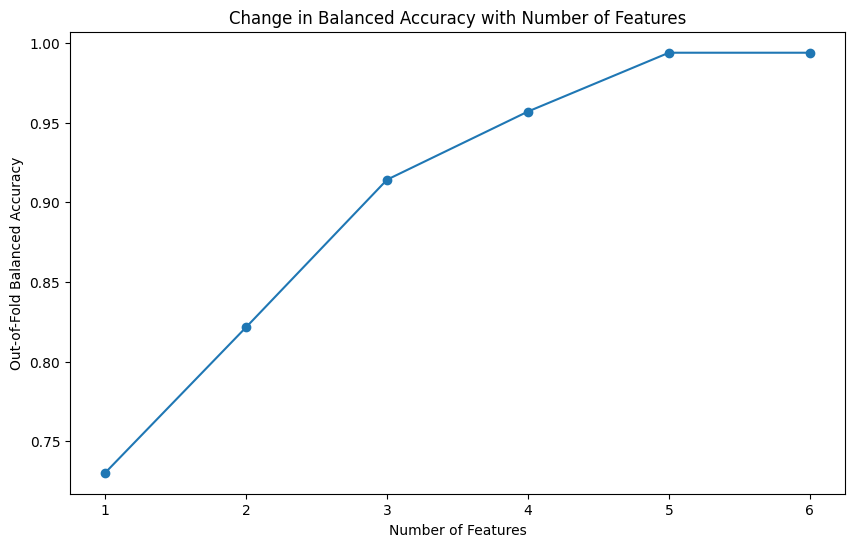

In [ ]:
# REMODELLING (VARIABLES)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize an empty list to store the out-of-fold balanced accuracy for each model
oof_accs = []
models = []  # List to store trained models
X2_list = [] #List to store X2

# Iterate over the range of selected features to build models iteratively
for i in range(1, len(sorted_selected_features) + 1):
    # Extract the top i features
    current_features = [feature for feature, _ in sorted_selected_features[:i]]

    # Print the current set of features
    print(f"\nModel {i} - Features: {current_features}")

    # Identify categorical and numerical columns
    categorical_cols = [col for col in current_features if col in categorical_columns]
    numerical_cols_to_scale = [col for col in current_features if col in numerical_columns]

    # Apply one-hot encoding to categorical columns
    if categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        X2_encoded = encoder.fit_transform(X2[categorical_cols])
    else:
        # If no categorical columns, set X2_encoded to the original values
        X2_encoded = X2[current_features]

    # Encode the target variable y
    encoder_y = LabelEncoder()
    y_encoded = encoder_y.fit_transform(y2)

    # Scale numerical columns for selected features
    if numerical_cols_to_scale:
        scaler = RobustScaler()
        X2_scaled = scaler.fit_transform(X2[numerical_cols_to_scale])
    else:
        # If no numerical columns, set X2_scaled to the original values
        X2_scaled = X2[current_features]

    # Combine encoded categorical and scaled numerical features
    if categorical_cols and numerical_cols_to_scale:
        X2_final = pd.DataFrame(X2_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
        X2_final[numerical_cols_to_scale] = X2_scaled
    elif categorical_cols:
        X2_final = pd.DataFrame(X2_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
    elif numerical_cols_to_scale:
        X2_final = pd.DataFrame(X2_scaled, columns=numerical_cols_to_scale)
    else:
        # If no categorical or numerical columns, set X2_final to the original values
        X2_final = X2[current_features]

    X2_list.append(X2_final)

    # Split data into training and testing sets
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2_final, y_encoded, test_size=0.2, random_state=42)



    # Initialize lists to store resource usage metrics


        # Start monitoring training time


        # Apply SMOTE within each training fold


        # Fit Model on Resampled Train

        # Save the trained model in the list


        # Predictions and evaluation with weighted accuracy

        print(f"Fold {fold}: Balanced Accuracy = {acc_score:.4f}")

        # Stop monitoring training time

        print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

        # Monitor memory usage

        print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

        fold += 1

    # Calculate and print out-of-fold balanced accuracy

    print(f'Model {i} - Out of Fold Balanced Accuracy: {oof_acc:.4f}\n')

    # Display average resource usage metrics

    print(f'Average training time: {avg_training_time_xgb2_2:.2f} seconds')
    print(f'Average memory usage: {avg_memory_usage_xgb2_2} bytes')

# Plot the change in balanced accuracy with the number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_selected_features) + 1), oof_accs, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Out-of-Fold Balanced Accuracy')
plt.title('Change in Balanced Accuracy with Number of Features')
plt.show()


## New Model & Testing

### New Model

In [ ]:
data2 = data
# Separate features and target


# Select categorical columns


# Select numerical columns


# Apply one-hot encoding to categorical columns


# Encode the target variable y


# Scale numerical columns


# Combine encoded categorical and scaled numerical features


# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_final, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Weighted balanced accuracy & Computing resource

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 0
accs = []

# Initialize lists to store resource usage metrics
training_times = []
memory_usages = []

for train_idx, val_idx in skf.split(X2_train, y2_train):
    print(f"======= Fold {fold} ========")



    # Count the number of instances in each class before SMOTE

    print(f"Class counts before SMOTE (Fold {fold}): {class_counts_before}")

    # Start monitoring training time


    # Apply SMOTE within each training fold



    print(f"Class counts after SMOTE (Fold {fold}): {class_counts_after}")

    # Fit Model on Resampled Train



    # Predictions and evaluation with balanced weighted accuracy


    print(f"Our balanced weighted accuracy on the validation set is {acc_score:.4f}")

    # Stop monitoring training time

    print(f"Training time for Fold {fold}: {elapsed_time:.2f} seconds")

    # Monitor memory usage

    print(f"Memory usage for Fold {fold}: {memory_usage} bytes")

    fold += 1

# Display average balanced weighted accuracy

print(f'\nOur out-of-fold balanced weighted accuracy score is {oof_acc_xgb2_2:.4f}')

# Display average resource usage metrics

print(f'Average training time: {avg_training_time_xgb2_2:.2f} seconds')
print(f'Average memory usage: {avg_memory_usage_xgb2_2} bytes')

======= Fold 0 ========
Class counts before SMOTE (Fold 0): Counter({1: 270, 3: 252, 2: 110, 0: 28})
Class counts after SMOTE (Fold 0): Counter({1: 270, 2: 270, 3: 270, 0: 270})
Our balanced weighted accuracy on the validation set is 0.9821
Training time for Fold 0: 1.27 seconds
Memory usage for Fold 0: 263237632 bytes
======= Fold 1 ========
Class counts before SMOTE (Fold 1): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after SMOTE (Fold 1): Counter({1: 271, 2: 271, 3: 271, 0: 271})
Our balanced weighted accuracy on the validation set is 0.9833
Training time for Fold 1: 0.43 seconds
Memory usage for Fold 1: 263888896 bytes
======= Fold 2 ========
Class counts before SMOTE (Fold 2): Counter({1: 271, 3: 252, 2: 109, 0: 28})
Class counts after SMOTE (Fold 2): Counter({1: 271, 2: 271, 3: 271, 0: 271})
Our balanced weighted accuracy on the validation set is 0.9724
Training time for Fold 2: 0.35 seconds
Memory usage for Fold 2: 264728576 bytes
======= Fold 3 ========
Class counts 

### Testing

In [ ]:
# Test Model Chosen (Model: XGB2: XGBoost-Stratified K-Fold CV-SMOTE)
# Predict on the test set
y_pred = xgb2.predict(X2_test)

# Compute class weights
class_weights = class_weight.compute_sample_weight('balanced', y2_test)

# Evaluate the model with weighted balanced accuracy
weighted_accuracy = balanced_accuracy_score(y2_test, y_pred, sample_weight=class_weights)
classification_rep = classification_report(y2_test, y_pred)

print("Weighted Balanced Accuracy:", weighted_accuracy)
print("Classification Report:\n", classification_rep)

Weighted Balanced Accuracy: 0.9314759036144579
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        31
           3       0.99      0.98      0.98        83

    accuracy                           0.98       184
   macro avg       0.90      0.93      0.91       184
weighted avg       0.99      0.98      0.98       184

